# All of Statistics Chapter 1 Python Problems

## Question 21

Suppose a coin has probability $p$ of fallings heads up. If we flip the coin many times, we would expect the proportion of heads to be near $p$. We will make this formal later. Take $p = .3$ and $n = 1,000$ and simulate $n$ coin flips. Plot the proportion of heads as a function of $n$. Repeat for $p = 0.03$.

In [107]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
# Defining a function that plots the proportion of heads as a function of n

def proportion_of_heads(p, n):
    
    # This numpy function allows us to simulate n I.I.D. samples of a Bernoulli random variable with parameter p
    tosses = np.random.binomial(1,p,n)
    
    proportion = np.array([])
    total_heads, total_tosses = 0,0
    
    # For each instance of the value 1 (which represents heads) in our array of tosses, we populate our new array "proportion"
    # with the quotient of heads so far over the total number of tosses
    for toss in tosses:
        if toss == 1:
            total_heads = total_heads+1
        total_tosses = total_tosses+1
        proportion = np.append(proportion, [total_heads/total_tosses])
    
    # Finally, we plot the result
    plt.plot(proportion)

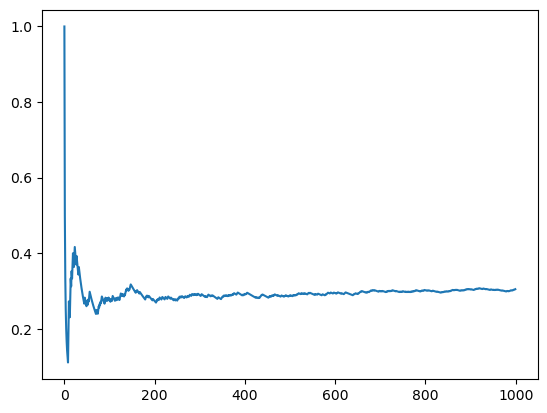

In [55]:
# The proportion for p = 0.3:

proportion_of_heads(0.3, 1000)

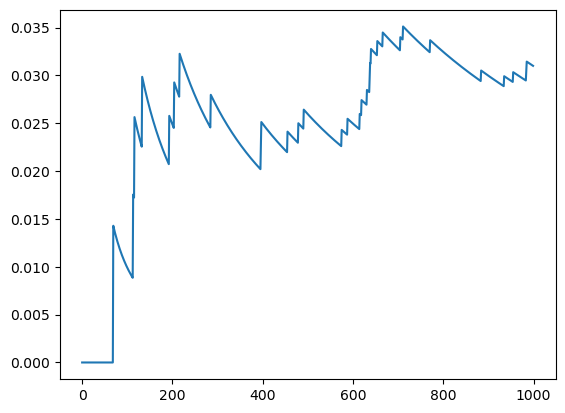

In [56]:
# The proportion for p = 0.03:

proportion_of_heads(0.03, 1000)

As expected, the proportion of heads seems to approach *p* as *n* gets large.

## Question 22

Suppose we flip a coin $n$ times and let $p$ denote the probability of heads. Let $X$ be the number of heads. We call $X$ a binomial random variable, which is discussed in the next chapter. Intuition suggests that $X$ will be close to $np$. To see if this is true, we can repeat this experiment many times and average the $X$ values. Carry out a simulation and compare the average of the $X$'s to $np$. Try this for $p = 0.3$ and $n = 10$, $n = 100$, and $n = 1,000$.

In [74]:
# We define a function that prints the observed average followed by the actual value of np:

def binomial_experiment(n, p, count):

    X = np.random.binomial(n,p,count)

    print("The observed average value of the random variable X is: ", np.average(X))
    print("The value of np is: ", n*p)

In [75]:
# For simplicity we take the # of samples of X to be 1000. We repeat the experiment for p = 0.3 and n = 10,100,1000.

binomial_experiment(10, 0.3, 1000)

The observed average value of the random variable X is:  2.973
The value of np is:  3.0


In [76]:
binomial_experiment (100, 0.3, 1000)

The observed average value of the random variable X is:  29.812
The value of np is:  30.0


In [77]:
binomial_experiment (1000, 0.3, 1000)

The observed average value of the random variable X is:  300.17
The value of np is:  300.0


# Question 23

Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let $A = \{ 2,4,6 \}$ and $B = \{ 1,2,3,4 \} $. Then, $\mathbb{P}(A) = 1/2$, $\mathbb{P}(B) = 2/3$ and $\mathbb{P}(AB) = 1/3$. Since $\mathbb{P}(AB) = \mathbb{P}(A)\mathbb{P}(B)$, the events $A$ and $B$ are independent. Simulate draws from the sample space and verify that $\hat{\mathbb{P}}(AB) = \hat{\mathbb{P}}(A) \hat{\mathbb{P}}(B)$, where $\hat{\mathbb{P}}$ is the proportion of times $A$ occured in the simulation and similarly for $\hat{\mathbb{P}}(AB)$ and $\hat{\mathbb{P}}(B)$. Now find two events $A$ and $B$ that are not independent. Compute $\hat{\mathbb{P}}(A)$, $\hat{\mathbb{P}}(B)$ and $\hat{\mathbb{P}}(AB)$. Compare the calculated values to their theoretical values. Report your results and interpret.


In [123]:
# We define a function that takes two events of a fair die roll and the number of rolls as input:

def dice_experiment(A,B,n):
    
    AB = []
    
    # First we initialize a list containing items in both A and B
    for item in A:
        if item in B:
            AB.append(item)
    
    A_observed, B_observed, AB_observed = 0, 0, 0

    # We then simulate n rolls of a fair die
    rolls = np.random.random_integers(1, 6, n)

    # Next, we iterate through the simulated rolls and count each time our events of interest are observed:
    for roll in rolls:
        if roll in A and roll in B:
            AB_observed = AB_observed + 1
            A_observed = A_observed + 1
            B_observed = B_observed + 1
        elif roll in A:
            A_observed = A_observed + 1
        elif roll in B:
            B_observed = B_observed + 1

    # Finally, we print our observations
    print("Theoretical proportion of A: ", len(A)/6)       
    print("Observed proportion of A: ", A_observed/n)

    print("\nTheoretical proportion of B: ", len(B)/6)    
    print("Observed proportion of B: ", B_observed/n)

    print("\nTheoretical proportion of AB: ", len(AB)/6) 
    print("Observed proportion of AB: ", AB_observed/n)

Let's perform the experiment with 100 rolls:

In [116]:
dice_experiment([2,4,6],[1,2,3,4],100)

Theoretical proportion of A:  0.5
Observed proportion of A:  0.62

Theoretical proportion of B:  0.6666666666666666
Observed proportion of B:  0.65

Theoretical proportion of AB:  0.3333333333333333
Observed proportion of AB:  0.36


We repeat the experiment with 1000 rolls:

In [117]:
dice_experiment([2,4,6],[1,2,3,4],1000)

Theoretical proportion of A:  0.5
Observed proportion of A:  0.466

Theoretical proportion of B:  0.6666666666666666
Observed proportion of B:  0.66

Theoretical proportion of AB:  0.3333333333333333
Observed proportion of AB:  0.304


As we'd expect, more rolls gives us observed values closer to the expected values.

Next, we want to repeat the experiment with events $A$, $B$ that are not independent. Let $A = \{ 1, 2, 6 \}$ and $B = \{ 1, 3, 4\}$. We have $AB = \{ 1 \}$, $\mathbb{P}(A) = \mathbb{P}(B) = 1/2$, and $\mathbb{P}(AB) = 1/6 \neq 1/4 = \mathbb{P}(A) \mathbb{P}(B)$.

Let's see what happens when we plug these into our experiment function:

In [118]:
dice_experiment([1,2,6],[1,3,4],100)

Theoretical proportion of A:  0.5
Observed proportion of A:  0.45

Theoretical proportion of B:  0.5
Observed proportion of B:  0.52

Theoretical proportion of AB:  0.16666666666666666
Observed proportion of AB:  0.1


Let's repeat again with 1000 rolls:

In [119]:
dice_experiment([1,2,6],[1,3,4],1000)

Theoretical proportion of A:  0.5
Observed proportion of A:  0.475

Theoretical proportion of B:  0.5
Observed proportion of B:  0.5

Theoretical proportion of AB:  0.16666666666666666
Observed proportion of AB:  0.147


How about 10000 rolls?

In [120]:
dice_experiment([1,2,6],[1,3,4],10000)

Theoretical proportion of A:  0.5
Observed proportion of A:  0.5025

Theoretical proportion of B:  0.5
Observed proportion of B:  0.5038

Theoretical proportion of AB:  0.16666666666666666
Observed proportion of AB:  0.1707


Once again, the observed proportion approaches the theoretical proportion as the number of rolls increases.